In [1]:
import uns
from uns import training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training.columns

Index(['subject', 'img', 'pixels', 'hasmask'], dtype='object')

## Images

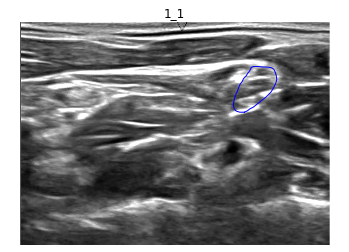

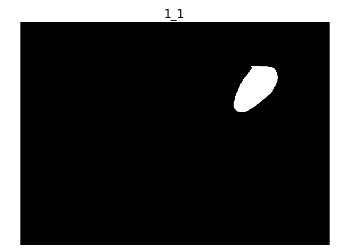

In [3]:
img = uns.image_pair(training.iloc[0])
ax = img.image.plot()
img.mask.plot()
img.mask.plot_contour(ax=ax)

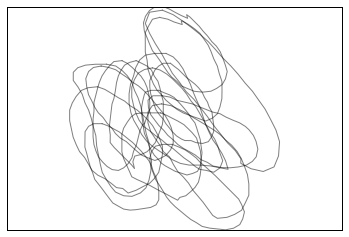

In [4]:
indices = [84, 798, 800, 1270, 1513, 1914, 2221, 2236, 2735, 3062, 3428, 3898, 4157, 4175, 4277, 4296, 5019]
batch = uns.batch(training.iloc[indices])
ax = None
for img in batch:
    ax = img.mask.plot_contour(ax=ax, color='k', alpha=0.5)

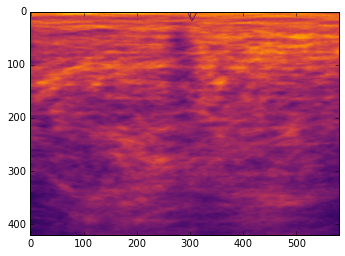

In [5]:
batchsum = np.sum(batch.array, axis=0)
plt.imshow(batchsum, cmap=plt.cm.inferno)

## iterate over all images/masks

In [6]:
batch = uns.batch(training)


In [ ]:
dflist = [batch.pop(0).mask.pandas for i in range(len(batch)) ]
newtraining = pd.DataFrame(data=dflist)

In [8]:
newtraining.head(5)

,centcol,centrow,contH,contW,contour,contxmax,contxmin,contymax,contymin,hasmask,...,skeldist90,skelmaxdist,skelpixels,subject,svd,svdx0,svdx1,svdy0,svdy1,unitcontour
0,0.759054,0.215119,0.141046,0.148295,"[[170.001960784, 170.008604422, 167.887180009,...",0.293118,0.144824,0.830697,0.689651,True,...,0.001724,0.048766,0.023012,1,"[[-1.37842373185, -0.338406000959], [-4.788721...",-1.378424,-0.338406,-4.788721,0.097409,"[[0.29273593398, 0.724553355232], [0.292747388..."
1,0.461796,0.253135,0.132774,0.187685,"[[200.001960784, 199.99991118, 199.061259228, ...",0.344831,0.157146,0.527586,0.394812,True,...,0.001724,0.055602,0.017894,1,"[[-1.61410522639, -0.370343091869], [-2.922555...",-1.614105,-0.370343,-2.922556,0.204538,"[[0.344394526881, 0.450927937857], [0.34439099..."
2,0.591766,0.212435,0.179318,0.193123,"[[179.001960784, 178.0064444, 174.927607716, 1...",0.308624,0.115501,0.681039,0.501721,True,...,0.001724,0.065267,0.019114,1,"[[-1.35677638838, -0.427168624741], [-3.736017...",-1.356776,-0.427169,-3.736017,0.155131,"[[0.308257803293, 0.550703852319], [0.30654139..."
3,0.509130,0.190581,0.105176,0.131088,"[[151.001960784, 151.002100933, 149.807912934,...",0.260348,0.129260,0.560348,0.455172,True,...,0.001724,0.053448,0.014750,1,"[[-1.23267697229, -0.268809177244], [-3.221328...",-1.232677,-0.268809,-3.221329,0.102863,"[[0.260019620134, 0.519811844367], [0.26001986..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#training['hasmask'] = training['Cc'].notnull()
newtraining.loc[3667,'hasmask'] = False
newtraining.loc[3667]

centcol                                                 0.259405
centrow                                                0.0794874
contH                                                   0.606912
contW                                                  0.0827358
contour        [[74.0019607843, 62.98951576, 45.979369745, 39...
contxmax                                                 0.12759
contxmin                                               0.0448538
contymax                                                 0.61376
contymin                                              0.00684852
hasmask                                                    False
img                                                           71
maskarea                                                0.187653
moments        [[2187390.0, 100844595.0, 4872208245.0, 246255...
pixels         1727 1 2147 5 2566 9 2986 13 3405 17 3824 21 4...
skelavgdist                                            0.0119867
skeldist10               

In [10]:
newtraining.to_msgpack('training.bin')

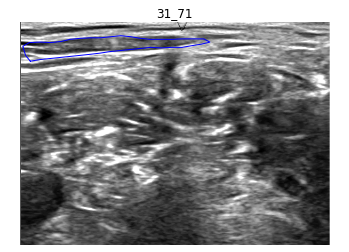

In [11]:
im_idx = 3667
im = uns.image_pair(newtraining.iloc[im_idx])
im.plot()